In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 

housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [2]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [3]:
price        = housing['SalePrice']
size_related = housing.filter(regex='SF$|Area$')
size_related.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
1,856,7890,0.0,618.0,856.0,856,0,0,399.0,0,0,0
2,1049,4235,149.0,104.0,1049.0,1049,0,0,266.0,0,105,0
3,1001,6060,0.0,100.0,837.0,1001,0,0,216.0,154,0,0
4,1039,8146,0.0,405.0,405.0,717,322,0,281.0,0,0,0
5,1665,8400,0.0,167.0,810.0,810,855,0,528.0,0,45,0


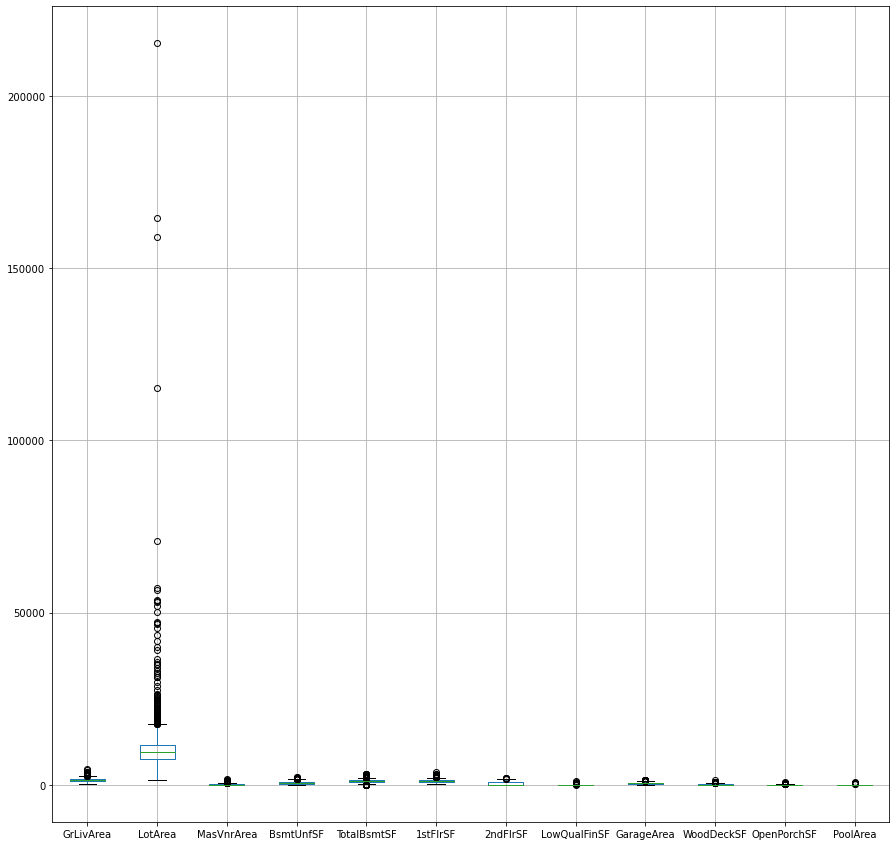

In [13]:
import matplotlib.pyplot as plt

size_related.boxplot(figsize = (15,15))

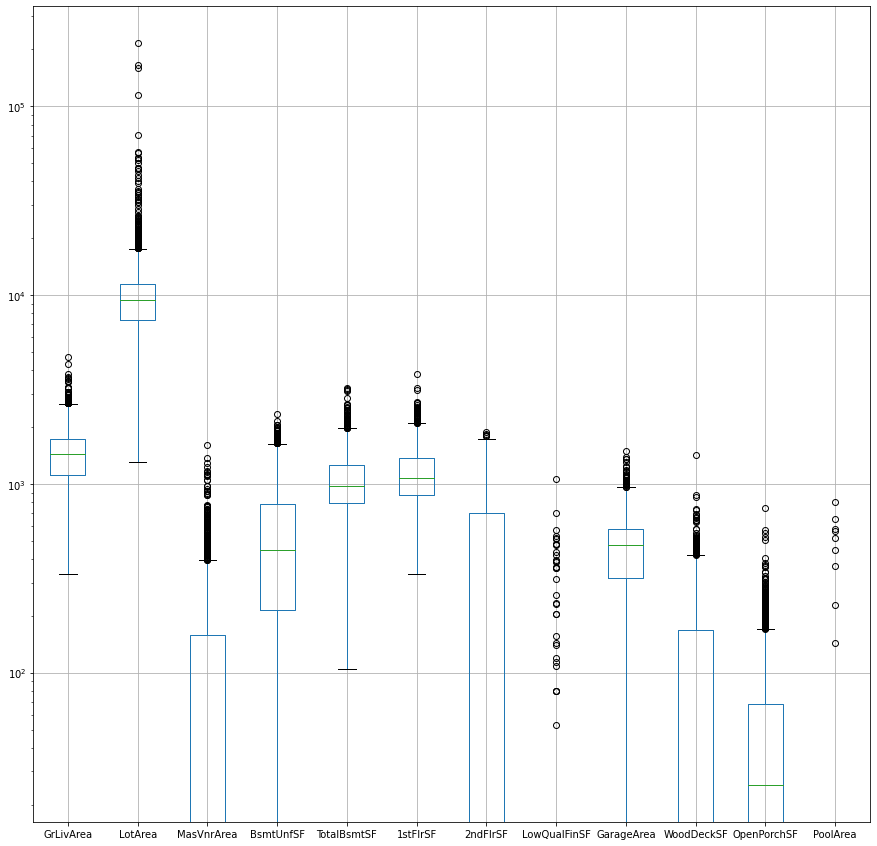

In [12]:
size_related.boxplot(figsize = (15,15))
plt.yscale('log')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf4524da00>,
      dtype=object)

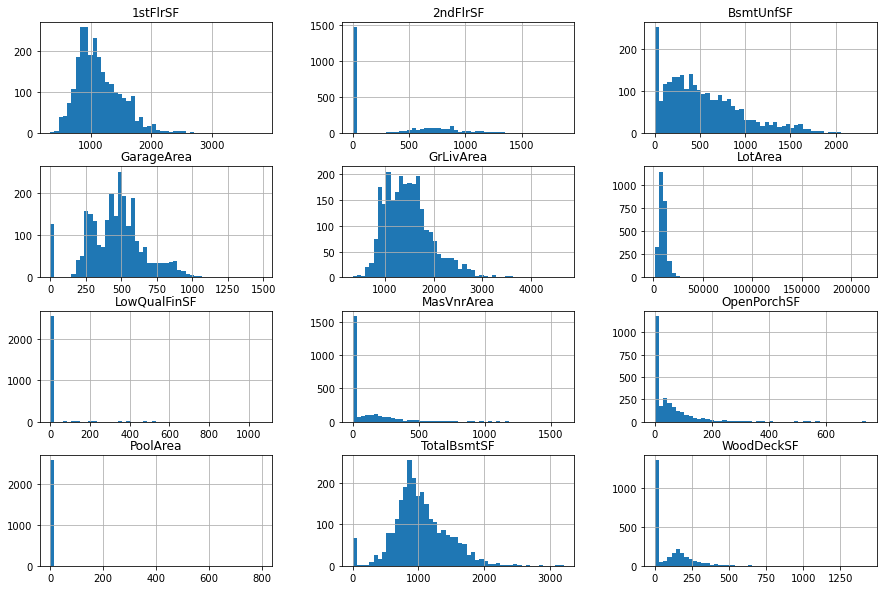

In [10]:
size_related.hist(bins = 50, figsize = (15,10))

In [15]:
housing.dtypes

PID               int64
GrLivArea         int64
SalePrice         int64
MSSubClass        int64
MSZoning         object
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 81, dtype: object


In [23]:
housing.isnull().sum(axis = 0).sort_values(ascending = False).head(30)

PoolQC          2571
MiscFeature     2483
Alley           2412
Fence           2055
FireplaceQu     1241
LotFrontage      462
GarageQual       129
GarageYrBlt      129
GarageFinish     129
GarageCond       129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtQual          69
BsmtCond          69
BsmtFinType1      69
MasVnrType        14
MasVnrArea        14
BsmtFullBath       2
BsmtHalfBath       2
Electrical         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
LotConfig          0
RoofMatl           0
Exterior2nd        0
dtype: int64

# Classifiction of Features

## Size Related
#### Numerical 
#### Categorical - Ordinal
#### Categorical - Nominal


## Descriptive (Quality and Features)
##### Categorical - Nominal
#### Categorical - Ordinal

## Age Related
#### Categorical - Ordinal

## Location Related
#### Categorical - Ordinal

## Sale Type
#### Categorical - Nominal


In [25]:
housing.FullBath.unique()

array([1, 2, 3, 0, 4])

In [30]:
housing.groupby('SaleCondition')['SalePrice'].mean().sort_values(ascending = False)

SaleCondition
Partial    285172.121951
Normal     175575.278790
Alloca     156766.500000
Family     146958.823529
Abnorml    143739.754098
AdjLand    138750.000000
Name: SalePrice, dtype: float64

In [31]:
housing.groupby('SaleCondition')['SalePrice'].count().sort_values(ascending = False)

SaleCondition
Normal     2414
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: SalePrice, dtype: int64

In [32]:
housing[housing.SaleCondition == 'Partial']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
8,528228540,1246,187687,20,RL,53.0,3710,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2008,New,Partial
17,906380120,1274,203000,20,RL,68.0,8814,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,1,2007,New,Partial
22,902201120,789,115000,20,RM,50.0,6000,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Partial
26,528218100,1458,168165,60,RL,58.0,13204,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2007,New,Partial
32,528222090,1258,173500,20,RL,64.0,7697,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,8,2007,New,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,528456240,1218,208300,20,FV,75.0,7862,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,9,2009,New,Partial
952,528429100,1670,336820,20,RL,49.0,15218,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,9,2006,New,Partial
981,531376090,1450,224243,20,RL,61.0,7328,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,New,Partial
986,533206060,1151,166000,120,FV,80.0,3523,Pave,Pave,IR1,...,0,0,NaN,NaN,NaN,0,2,2007,New,Partial


## Filter out 'Non-Normal' Sales??

In [33]:
re_data = pd.read_csv('Ames Real Estate Data.csv', index_col=0)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
re_data.head(40)

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,ASSOCIATION COMMON AREA,...,3449,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4506,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445020,520445020,0,0,4512 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4512,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520450001,520450001,0,0,3448 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,ASSOCIATION COMMON AREA,...,3448,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520450010,520450010,0,0,4421 EVEREST CIR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4421,NaN,EVEREST,CIR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520450020,520450020,0,0,4415 EVEREST CIR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4415,NaN,EVEREST,CIR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [69]:
re_data.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

In [71]:
re_data.YrSold_YYYY.unique()

array([  nan, 2019., 2017., 2018., 2020.])

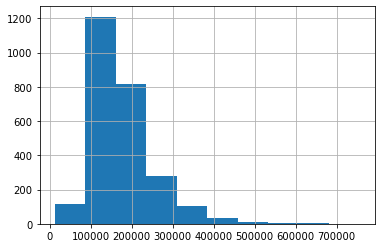

In [38]:
price.hist()

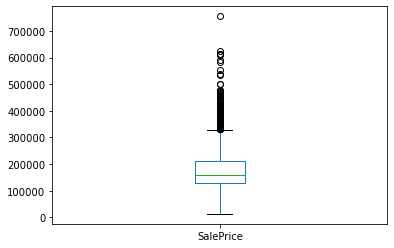

In [40]:
price.plot.box()

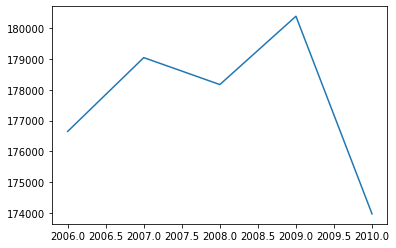

In [47]:
plt.plot(housing.groupby(['YrSold'])['SalePrice'].agg('mean'))

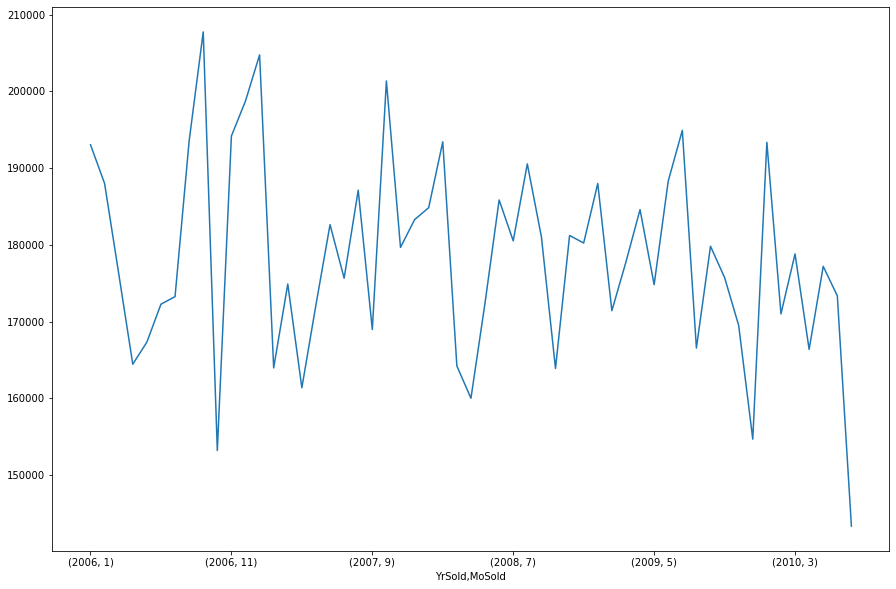

In [68]:
housing.groupby(['YrSold', 'MoSold'])["SalePrice"].agg('mean').plot(figsize = (15,10))

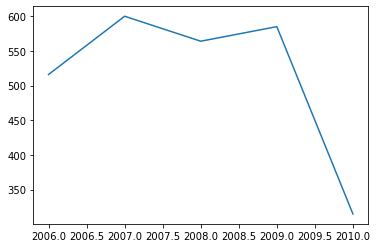

In [63]:
plt.plot(housing.groupby(['YrSold'])['SalePrice'].agg('count'))

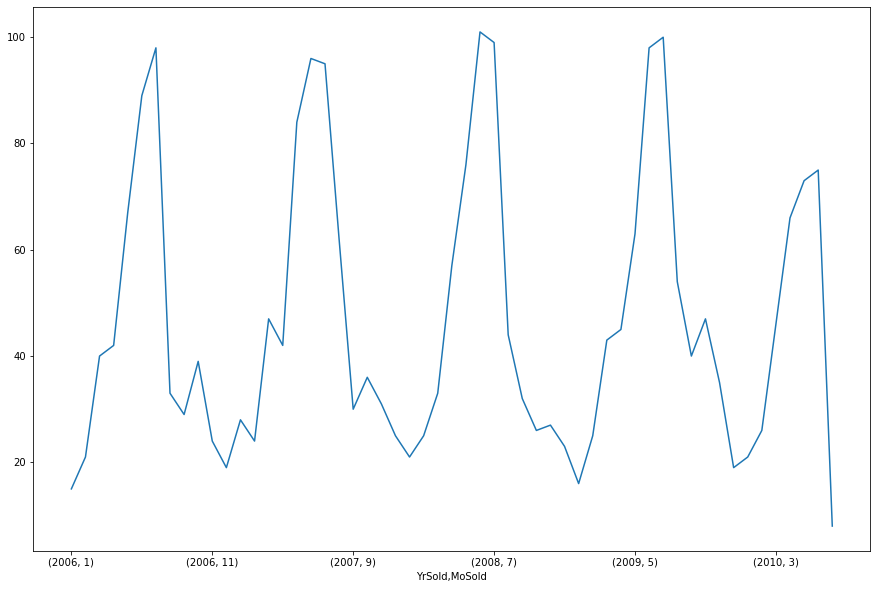

In [65]:
housing.groupby(['YrSold', 'MoSold'])["SalePrice"].agg('count').plot(figsize = (15,10))